<a href="https://colab.research.google.com/github/Alecia113/self-directed-exercises-python-/blob/main/KDB_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Word2Vec 最主要的问题是“ out of vocabulary” 。因为在我们训练模型的时候，一些单词并不包含在其中。我们输入后并不能查到。假如“apple”这个单词并不在Word2Vec里。那么我们在直接输入“apple”这个单词的时候就没办法使用Word2Vec查询到。 这个时候我们就可以使用FastText，比如使用“3-gram"处理”apple“这个词。那么苹果就会被分为：”app“,"ppl","ple"。把这些新划分的单词的向量加和再除以划分的部分和。例如：V（app)+V(ppl)+V(ple)/3。所以FastText可以避免”Out of vocabulary“的问题，还可以加快运行速度。

The main problem with Word2Vec is "out of vocabulary".This is because when we train the model, some words are not included in it. We can't find them when we type them in. Suppose the word "apple" is not in Word2Vec. Then we can't use Word2Vec to look up the word "apple" when we type it in directly. At this point we can use FastText, for example using "3-gram" for the word "apple". Then apple will be divided into: "app", "ppl", "ple".  The vectors of these newly divided words are summed and divided by the sum of the divided parts. For example: V(app)+V(ppl)+V(ple)/3. So FastText avoids the "Out of vocabulary" problem and speeds up the process.

In [1]:
import gensim.downloader as api
import pprint

In [2]:
words = ["beautiful", "smart", "clever","stupid","lovely","foolish"]

model = api.load('glove-wiki-gigaword-50') # 这个模型： glove 通过wiki 训练的一个五十维度的向量包

[==================================================] 100.0% 66.0/66.0MB downloaded


In [8]:
def find_synonym(word):
  a = []
  for target in words:
    cos_max = 0
    similar_word = ""#让它开始等于空

    for word in words:
      cos = model.similarity(target,word)

      if cos > cos_max and cos != 1:
        similar_word = word    #它把word单独存储了，然后返回的最大 我的好麻烦，没想到这么简单的想法
        cos_max =cos
    a.append((target, similar_word))
pprint.pprint(a)  # 这个打印必须定格。和def一致
  #return a

#a = find_synonym(words)
#pprint.pprint(a)
#或者不return直接在里面pprint

[('beautiful', 'lovely'),
 ('smart', 'clever'),
 ('clever', 'smart'),
 ('stupid', 'foolish'),
 ('lovely', 'beautiful'),
 ('foolish', 'stupid')]


test

In [26]:
target = words[0]
 
for target in words:
  cos_max = 0
  similar_word = ""#让它开始等于空

  for word in words:
    cos = model.similarity(target,word)

    if cos > cos_max and cos != 1:
      similar_word = word    #它把word单独存储了，然后返回的最大 我的好麻烦，没想到这么简单的想法
      cos_max =cos
  print((target, similar_word))

('beautiful', 'lovely')
('smart', 'clever')
('clever', 'smart')
('stupid', 'foolish')
('lovely', 'beautiful')
('foolish', 'stupid')


In [17]:
model.distance("clever","beautiful")  #欧式距离

0.47276902198791504

In [16]:
model.similarity("clever", "beautiful")  #模型中只需要输入单词不需要输入向量 #四舍五入

0.527231

In [15]:
#用个土方法算一下
import numpy as np
num = model["clever"].dot(model["beautiful"])
denom =np.linalg.norm(model["clever"]) * np.linalg.norm(model["beautiful"]) #模长*模长。 #要加np.linalg[求模长]
cos = num / denom
print(cos)

0.5272309


In [3]:
model["clever"].shape  #维度

(50,)

In [4]:
model["clever"] #固定的存在模型里

array([ 0.39994 , -0.96035 , -0.36843 , -0.39448 ,  0.46439 ,  0.52158 ,
       -0.034179, -0.68595 , -0.77604 ,  1.2788  , -0.98484 ,  0.65847 ,
       -0.26908 ,  0.48251 , -0.30359 , -0.8552  ,  0.94573 ,  0.15719 ,
       -0.076112, -0.61747 , -0.035523,  0.44234 , -0.26867 ,  0.35713 ,
        1.2506  , -0.86741 , -0.62352 ,  0.20012 ,  0.63649 , -0.81793 ,
        1.6352  , -0.41211 ,  0.15146 ,  0.13336 ,  0.26726 ,  0.78023 ,
       -0.4929  ,  0.96156 , -0.73867 , -0.64079 ,  0.98881 ,  0.83653 ,
       -0.27653 ,  0.4271  ,  0.47187 , -0.45351 ,  1.0394  ,  0.47516 ,
        0.74609 ,  0.80909 ], dtype=float32)

In [7]:
for i in words:
  print(i)

beautiful
smart
clever
stupid
lovely
foolish


# **下面做一个pytorch 模型，让一条线拟合它** 
**用pytorch，进行一个简单的神经网络的构造，定义优化器以及训练的过程**


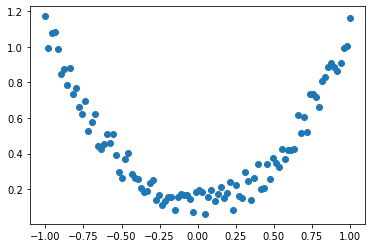

In [21]:
''' 回归问题【第一大步骤】
'''
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1) #从-1，1里面取100个点  #范围+取值点
y = x.pow(2) + 0.2*torch.rand(x.size()) #x平方 +0.2*一个 (error 误差)    (0.2 就是让点集变稀疏了，形状还是那个形状。离散了) 加上就是离散的状态。不加就是平滑直线
# torch.rand(*size, out=None) 返回Tensor 张量 从【0，1）中均匀分布 中抽取的一组随机数，张量由sizes 定义。 
#size int sqencence 定义了output shape； out（Tensor，optinal） 结果张量 Test1

plt.scatter(x.data.numpy(), y.data.numpy())

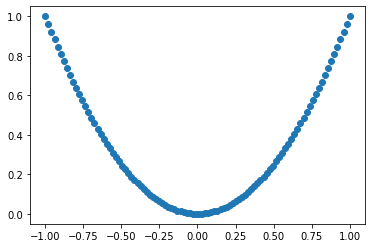

In [24]:
x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1)
y = x.pow(2)
plt.scatter(x.data.numpy(), y.data.numpy())

In [25]:
#pytorch
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [54]:
#调包
#sklearn - sklearn.LinearRegression()   sklearn能调的包都是最简单的包，它不能进行定制化的learning rate 不能定制化的 back ward
#高级的调包（高调）我们要进行的
#pytorch ——》 很像是乐高积木 （nn.Linear(), nn.Cov2d（）卷积层， nn.MaxPool()这些都是层，然后跟积木似的随便搭配）
#CNN一层卷积一层池化一层卷积一层池化+……    VGG （一个卷积+一个池化是一层）调的是积木和组件

#模型：
import torch.nn as nn  # torch.nn 是import 的大包，nn是模型
class Net(nn.Module): #是父类子类的问题。 Class 子类（父类）像是在括号外面弄了个影分身，我的东西你都可以拿去用，但是不是我。

  def __init__(self, n_input, n_hidden, n_output):  #input feature的数量，hidden layer的数量；output的数量
    #关键语法固定不变的 
    super(Net, self).__init__() #dot A·ni手
    self.hidden = nn.Linear(n_input, n_hidden)  #(隐藏层，我们输入的数量到隐藏层)
    self.output = nn.Linear(n_hidden, n_output)  #从隐藏到输出  都是整数 数量 #如下图
  
  #当我们调用Net 的object 时，默认方法是 forward
  def forward(self, x):

    x = self.hidden(x)  #先经过input到hidden层，

    #线性回归需要个激活函数，是需要激活的
    x = F.relu(x) #激活函数不算层数
    x = self.output(x)  #再从hidden层到output层

    return x

#三层的神经网络  这是搭建成功了一个模型

net = Net(1,10,1)
print(net)
#用一个神经网络训练回归比较大材小用，也可的
#【整个模型就定义好了】

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)



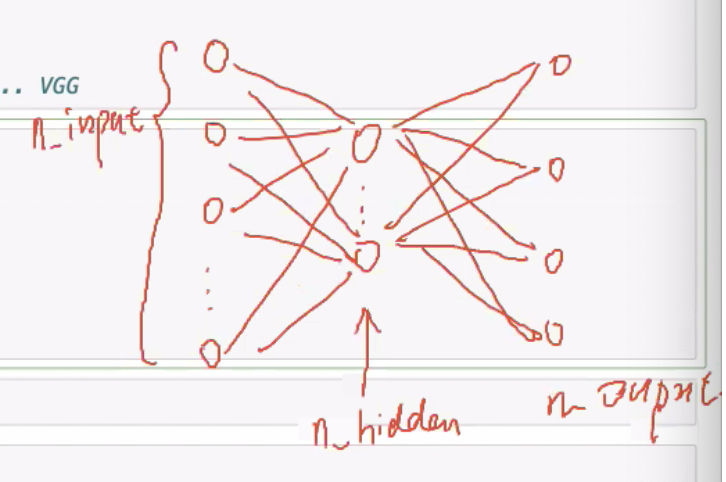

In [57]:
#定义好模型要开始定义优化器 #进行随机梯度下降的时候， 我们会用到Adam 这么随机下降的一个参数 比SGD 梯度下降更快的一个算法
optimizer = torch.optim.SGD(net.parameters(), lr = 0.2)
#optimizer = torch.optim.SGD(net.parameters(), lr = 1.0)
#optimizer = torch.optim.SGD(net.parameters(), lr = 0.5) 变弯过程明显比0.2快很多
'''
当你的模型没有拟合或者没有拟合的很好。可能就是lr的过大了
'''

#如果你是Adam 就如下  Adam (神经网络参数 test4)
# optimizer = torch.optim.Adam(net.parameters(), lr = 0.2) possible
loss_func = torch.nn.MSELoss() # for regression mean squared loss  


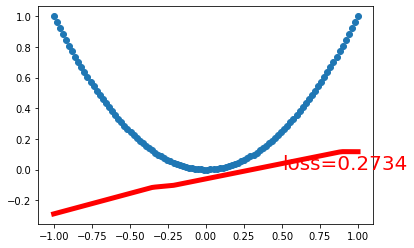

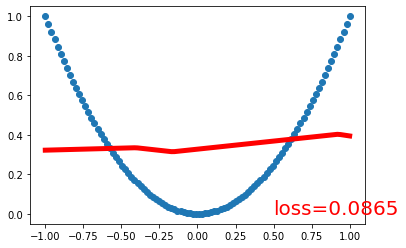

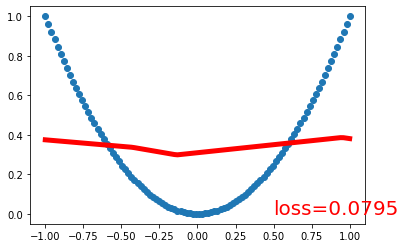

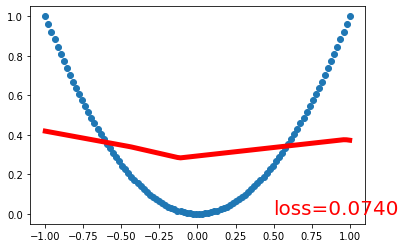

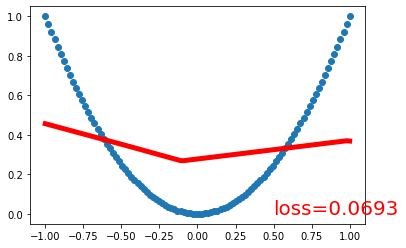

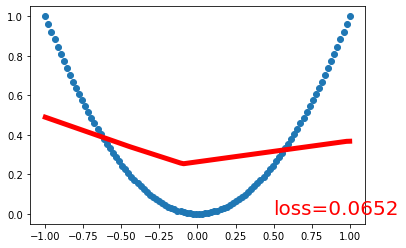

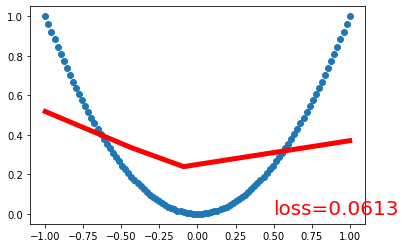

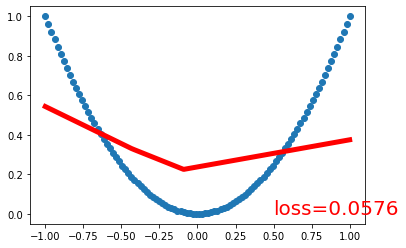

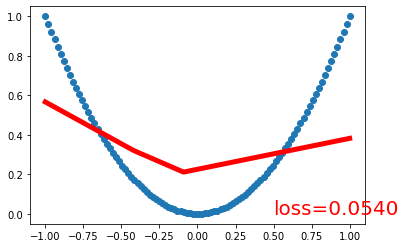

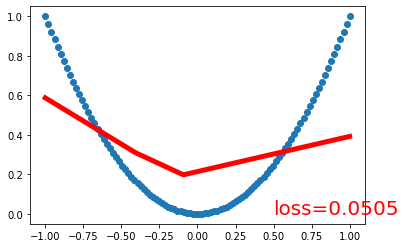

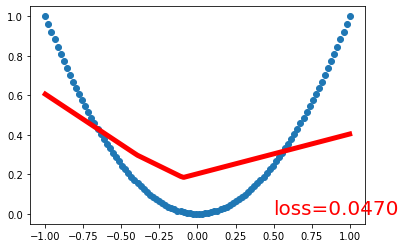

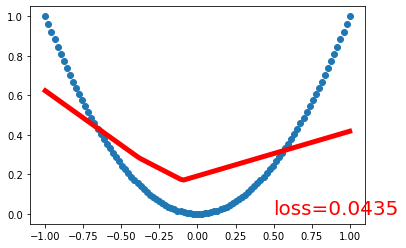

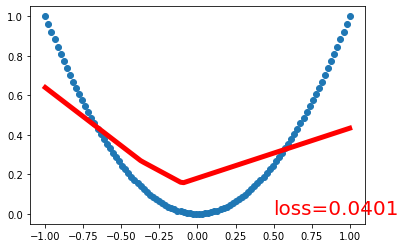

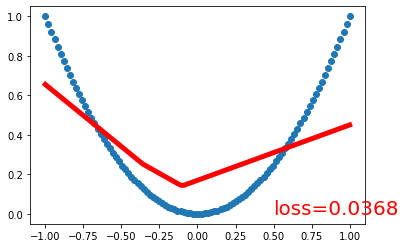

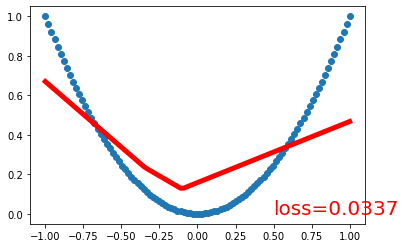

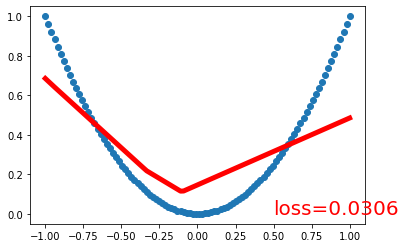

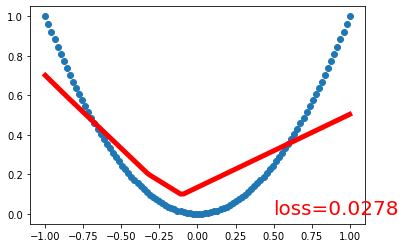

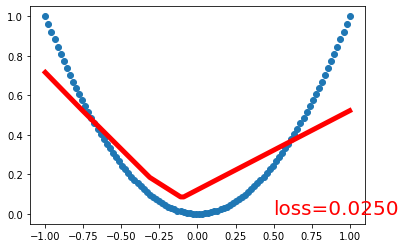

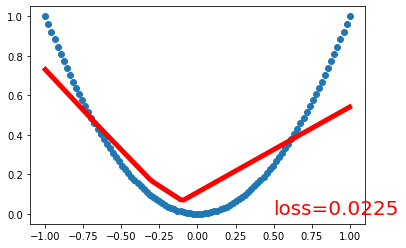

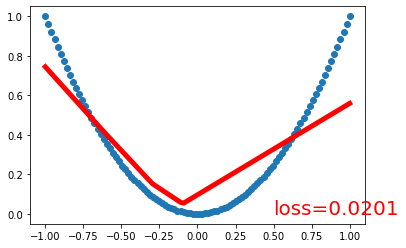

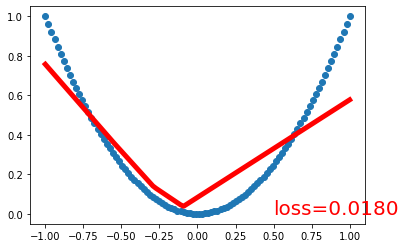

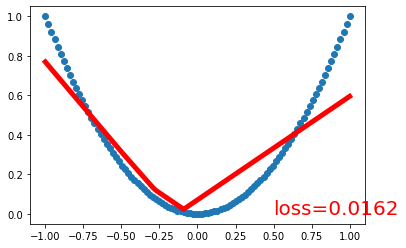

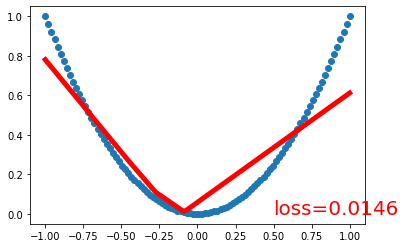

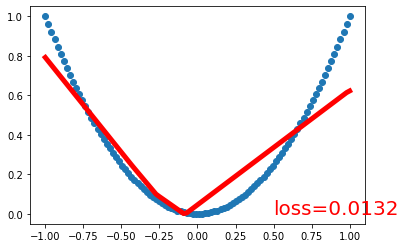

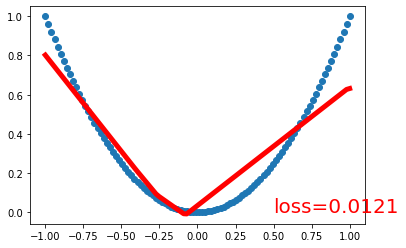

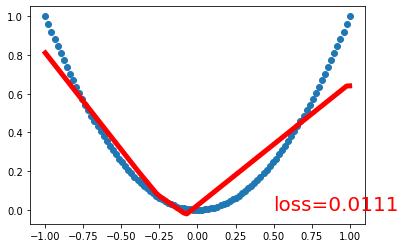

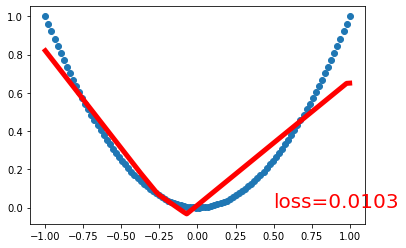

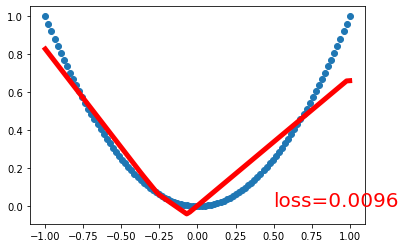

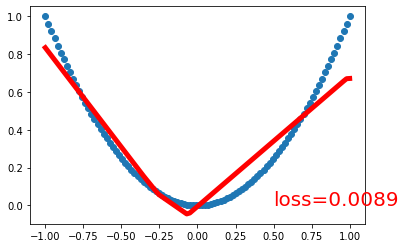

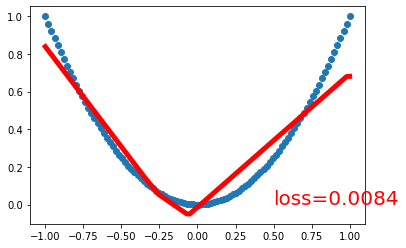

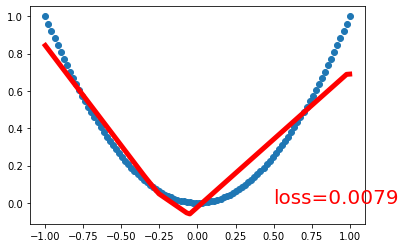

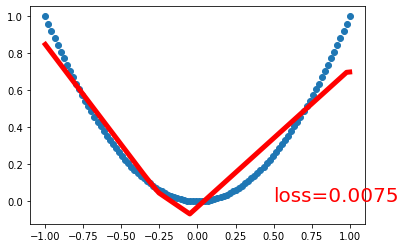

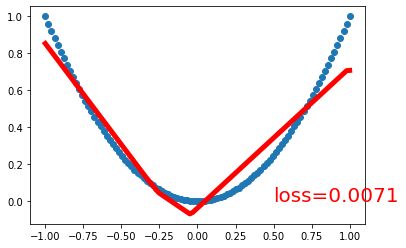

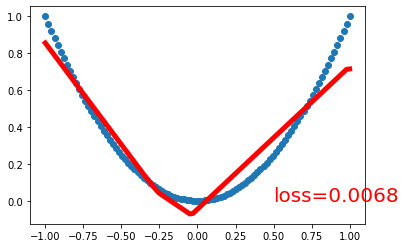

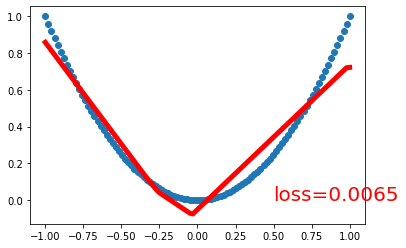

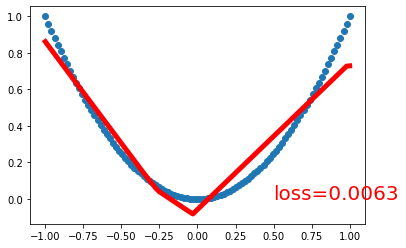

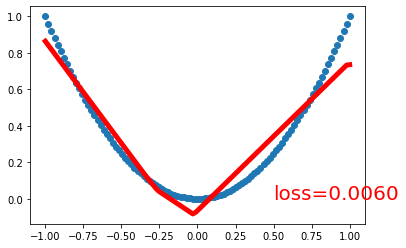

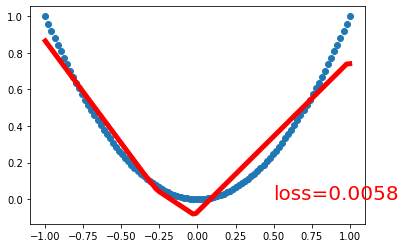

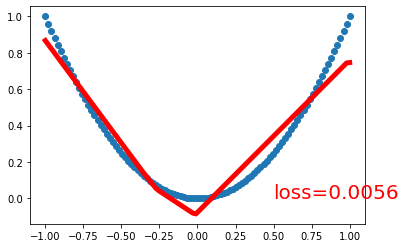

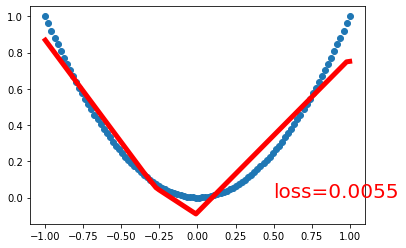

In [58]:
plt.ion()   #something about plotting有什么东西开始要画了。要开始准备了

for t in range(200):     #这个是我们的input 我们会训练200次
   #就会进行进入，从进入层到hidden层，然后激活，然后从hidden layer 到output；；这个是我们的预测结果（跑完这个模型就是预测结果了）
  prediction = net(x)    # input x and predict based on x #直接调用这个的时候，默认的方法是forward （前面）  def forward(self, x):
   # loss = torch.nn.MSELoss(prediction,y)
  loss = loss_func(prediction, y) # must be (1. nn output, 2.target)  #然后把你的预测的和y做对比  然后我们的loss——func就会根据方法计算你的损失
  '''有点稳定的三步，少不了；清除优化器里的残留数据，然后让我们的数据进行反向传播'''
  optimizer.zero_grad()   # clear gradients for next train  清除优化器里原来的梯度   #清除上一次训练的残余数据。
  loss.backward()         # backpropagation , compute gradients  #计算梯度
  optimizer.step()        # apply gradients    #然后用结果进行梯度下降的更新
  '''写好模型去训练'''
  if t % 5 ==0:      #每五个epoch 每五个一时期
    # plot and show learning process
    plt.cla()
    plt.scatter(x.data.numpy(), y.data.numpy())    #蓝点线  画x 和y 我们的标准数据''' 回归问题【第一大步骤】'''
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)   #红线  还要画我们x的数据和我们的预测值 #lw宽度
    #因为我们是线性方程。所以x和预测值很接近
    #下面这部可有可无 
    plt.text(0.5, 0, 'loss=%.4f' % loss.data.numpy(), fontdict={'size':20, 'color': 'red'}) #冒号要在size''外 右下角的红色loss标注
    plt.pause(0.1)   #从一个图变成好多图 泡滋-暂停

    #是没去跑上面的你写的模型。 两个地方都没跑

plt.ioff()
plt.show()

#因为是个线性方程，我们的预测值和实际的还是很相似的。
#预测的是红色的， 第一个上面的是真实的



**Test**

In [36]:
#4  他想进行net.paramenters 的获取
len(list(net.parameters()))  #他是两个矩阵，一个是1*10的matrix 是个10*1 的matrix

4

In [23]:
#3 第一个图的xy测试
y

tensor([[1.1714],
        [0.9944],
        [1.0785],
        [1.0814],
        [0.9857],
        [0.8468],
        [0.8765],
        [0.7872],
        [0.8789],
        [0.7345],
        [0.7670],
        [0.6641],
        [0.6201],
        [0.6952],
        [0.5266],
        [0.5763],
        [0.6200],
        [0.4419],
        [0.4277],
        [0.4545],
        [0.5128],
        [0.4576],
        [0.5086],
        [0.3899],
        [0.2991],
        [0.2622],
        [0.3696],
        [0.4021],
        [0.2843],
        [0.2618],
        [0.2574],
        [0.2048],
        [0.1843],
        [0.1889],
        [0.2378],
        [0.2517],
        [0.1376],
        [0.1661],
        [0.1096],
        [0.1320],
        [0.1558],
        [0.1567],
        [0.0852],
        [0.1581],
        [0.1745],
        [0.1674],
        [0.1700],
        [0.1479],
        [0.0720],
        [0.1871],
        [0.1980],
        [0.1845],
        [0.0615],
        [0.1572],
        [0.1978],
        [0

In [22]:
#2
x

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [2]:
#1
import torch  #调包啊
torch.rand(2,3)


tensor([[0.9529, 0.2254, 0.6885],
        [0.5663, 0.2135, 0.6864]])